In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mplhep as hep
hep.style.use("CMS")

In [3]:
# Linear evaluation values
l1 = np.load('../data/supervised_SimCLR_MLP_lineval.npz', allow_pickle=True)
l2 = np.load('../data/selfsupervised_SimCLR_MLP_lineval.npz', allow_pickle=True)
l3 = np.load('../data/vicreg_acc_error.npz', allow_pickle=True)
l4 = np.load('../data/ot.npy', allow_pickle=True)
l5 = np.load('../data/supervised_SimCLR_transformer_lineval.npz', allow_pickle=True)
# p-values
p1 = np.load('../data/6Dleadingobject_pvals_asym.npz', allow_pickle=True)
p2 = np.load('../data/noEmbedding_pvals_asym.npz', allow_pickle=True)
p3 = np.load('../data/selfsupervised_SimCLR_MLP_pvals_asym.npz', allow_pickle=True)
p4 = np.load('../data/supervised_SimCLR_MLP_pvals_asym.npz', allow_pickle=True)
p5 = np.load('../data/supervised_SimCLR_transformer_pvals_asym.npz', allow_pickle=True)

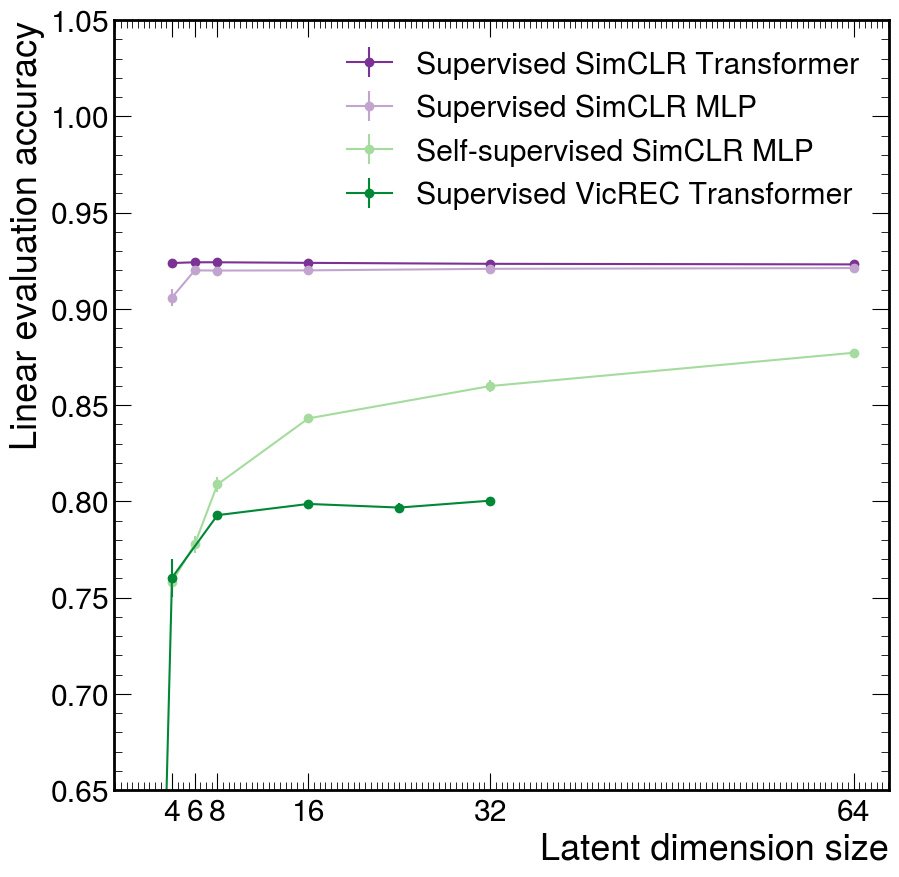

In [7]:
#plot linear evaluation
colors = ['#7b3294','#c2a5cf','#a6dba0','#008837']
plt.errorbar(l5["embedding"], l5["accuracy"], l5["error"], c=colors[0],marker='o', label='Supervised SimCLR Transformer')
plt.errorbar(l1["embedding"], l1["accuracy"], l1["error"], c=colors[1],marker='o', label='Supervised SimCLR MLP')
plt.errorbar(l2["embedding"], l2["accuracy"], l2["error"], c=colors[2],marker='o', label='Self-supervised SimCLR MLP')
plt.errorbar(l3["embedding"], l3["accuracy"]/100., l3["error"]/100, c=colors[3],marker='o', label='Supervised VicREC Transformer')

plt.ylim(.65, 1.05)
plt.xlabel('Latent dimension size')
plt.ylabel('Linear evaluation accuracy')
plt.xticks(l1["embedding"])
plt.legend()
plt.savefig("../plots/lineval.pdf", format="pdf")

In [35]:
# p'embedding']: the embedding dimension (In this case just the 6D leading object pTs). For the actual embeddings this includes all of the dimensions.
# p['pvals']: The first dimension of the pvals array refers to the signal type: 4-7
# The second dimension refers to the three injection rates: 0.1, 0.5, 1%
# The third dimension is the power P(Z>3), the upper error and the lower error
# For more info, see p['info_for_pvals_array']

print(p3["pvals"].shape) #(6=dims, 4=signal, 3=strength, 3=power,upper,lower)
print((p3["pvals"][:][0][0][0]).flatten)
print(p3["embedding"])
# plot p-values for leptoquark(signaltype==0)
# colors = ['#a6611a','#dfc27d','#80cdc1','#018571']
# plt.errorbar(p3["embedding"], p3["pvals"][:][0][1][0], p3["pvals"][:][0][1][1], p3["pvals"][:][0][1][2], c=colors[0],marker='o', label='0.1%')
# # plt.errorbar(p3["embedding"], p3["pvals"][0][1][0], p3["pvals"][0][1][1], p3["pvals"][0][1][2], c=colors[1],marker='o', label='0.5%')
# # plt.errorbar(p3["embedding"], p3["pvals"][0][2][0], p3["pvals"][0][2][1], p3["pvals"][0][2][2], c=colors[2],marker='o', label='1.0%')
# # plt.errorbar([4,8,16,32,64], l4/100, [0.01,0.01,0.01,0.01,0.01], c=colors[2],marker='*', label='Optimal Transport')
# plt.ylim(.45, .95)
# plt.xlabel('Latent dimension size')
# plt.ylabel('p-value (Z>3)')
# plt.xticks(l1["embedding"])
# plt.legend()
# plt.savefig("../plots/pvals.pdf", format="pdf")




(6, 4, 3, 3)
<built-in method flatten of numpy.ndarray object at 0x7fa7e5860ab0>
[ 4  6  8 16 32 64]
